In [1]:
import pandas as pd
import numpy as np

In [8]:
import seaborn as sns

In [2]:
df = pd.read_csv('Processed_27.csv')

In [3]:
X_train = df.iloc[:1460,:]

RangeIndex(start=0, stop=1460, step=1)

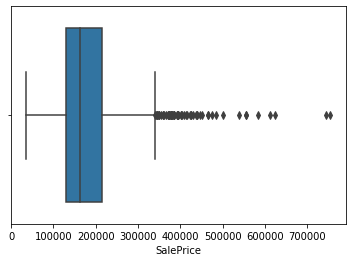

In [9]:
sns.boxplot(X_train['SalePrice'])

In [31]:
X_dummy = X_train.copy()

In [10]:
std = X_train['SalePrice'].std()

In [12]:
mean = X_train['SalePrice'].mean()

In [52]:
count = 0
X_train = X_dummy.copy()
for row in X_train.index:
    Z_score = (X_train.iloc[row]['SalePrice'] - mean)/std
    if(np.abs(Z_score)>=3):
        count = count+1
        print(X_train.iloc[row]['SalePrice'],'Removed','Count',count,'Row',row)
        X_train.drop(row,axis=0,inplace=True)
count

438780.0 Removed Count 1 Row 58
501837.0 Removed Count 2 Row 177
475000.0 Removed Count 3 Row 183
437154.0 Removed Count 4 Row 346
426000.0 Removed Count 5 Row 385
555000.0 Removed Count 6 Row 435
440000.0 Removed Count 7 Row 467
430000.0 Removed Count 8 Row 489
446261.0 Removed Count 9 Row 519
451950.0 Removed Count 10 Row 582
423000.0 Removed Count 11 Row 654
755000.0 Removed Count 12 Row 680
538000.0 Removed Count 13 Row 757
485000.0 Removed Count 14 Row 785
582933.0 Removed Count 15 Row 789
611657.0 Removed Count 16 Row 883
556581.0 Removed Count 17 Row 1030
424870.0 Removed Count 18 Row 1125
625000.0 Removed Count 19 Row 1151
745000.0 Removed Count 20 Row 1163
465000.0 Removed Count 21 Row 1223
466500.0 Removed Count 22 Row 1352


IndexError: single positional indexer is out-of-bounds

In [53]:
X_train.shape

(1438, 194)

In [37]:
from xgboost import XGBRegressor

In [54]:
xgbr1 = XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [55]:
xgbr1.fit(X_train.drop('SalePrice',axis=1),X_train['SalePrice'])

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[19:17:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [56]:
y_predict = xgbr1.predict(df.iloc[1460:,:].drop('SalePrice',axis=1))

In [65]:
df_final = pd.DataFrame({'Id':range(1461,2920),'SalePrice':y_predict})

In [50]:
y_predict

array([125750.39, 172750.02, 179143.16, ..., 159281.02, 119235.82,
       221439.83], dtype=float32)

In [66]:
df_final.to_csv('outliers_stretched.csv',index=False)

In [57]:
y_predict

array([123854.99, 168355.17, 175813.16, ..., 154361.75, 118062.03,
       234289.36], dtype=float32)

In [63]:
for i in range(len(y_predict)):
    if y_predict[i]>=400000:
        y_predict[i] = y_predict[i]*1.1

In [61]:
np.sum(y_predict)

261466720.0

In [64]:
np.sum(y_predict)

263037730.0